In [1]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
multi_data = pd.read_csv('C:\\Users\\LENOVO\\OneDrive\\Máy tính\\DocumentFolder\\multi_data.csv') # đọc file đã tiền xử lý
multi_data.drop(multi_data.columns[0],axis=1,inplace=True)
categorical_label_classes = np.load('C:\\Users\\LENOVO\\OneDrive\\Máy tính\\DocumentFolder\\categorical_label_classes.npy',allow_pickle=True) 

In [3]:
# Auto Encoder Classifier (Multi-class Classification)

In [4]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(multi_data, test_size=0.25, random_state=42)

In [5]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_train = X_train.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

y_test = X_test['intrusion'] # target attribute

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

In [6]:
X_train = X_train.values
X_test = X_test.values

In [7]:
y_test = y_test.values

In [12]:
from sklearn import metrics
# from sklearn.metrics import accuracy_score # for calculating accuracy of model
# from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
# from sklearn.metrics import classification_report # for generating a classification report of model
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import Input
from keras.models import Model

# representation of model layers
from keras.utils.vis_utils import plot_model

# input theo chiều của dataset
input_shape = X_train.shape[1]
encoding_neuron = 50 # h là 50 neuron

In [13]:
# cấu hình cho model deep Autoencoder classification
#input layer
input_layer = Input(shape=(input_shape, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_neuron, activation="relu")(input_layer)         
#decoding and output layer
output_layer = Dense(input_shape, activation='softmax')(encoder)

In [14]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [15]:
# summary of model layers
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 93)]              0         
                                                                 
 dense (Dense)               (None, 50)                4700      
                                                                 
 dense_1 (Dense)             (None, 93)                4743      
                                                                 
Total params: 9,443
Trainable params: 9,443
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystopping = keras.callbacks.EarlyStopping(monitor="loss", mode="auto", patience=10, restore_best_weights=True)

In [ ]:
# model.fit(train_ds,
#             epochs=60,
#             validation_data=validation_ds,
#             validation_freq=1,
#             callbacks=[tensorboard_cb, earlystopping])

In [16]:
# training the model on training dataset
history_train = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
189/189 [==============================] - 2s 6ms/step - loss: 0.1145 - accuracy: 0.2775 - val_loss: 0.1062 - val_accuracy: 0.4448
Epoch 2/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1052 - accuracy: 0.6689 - val_loss: 0.1051 - val_accuracy: 0.7144
Epoch 3/100
189/189 [==============================] - 1s 5ms/step - loss: 0.1048 - accuracy: 0.7242 - val_loss: 0.1050 - val_accuracy: 0.7408
Epoch 4/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1047 - accuracy: 0.7670 - val_loss: 0.1049 - val_accuracy: 0.7808
Epoch 5/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1046 - accuracy: 0.7932 - val_loss: 0.1049 - val_accuracy: 0.7863
Epoch 6/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1046 - accuracy: 0.8133 - val_loss: 0.1048 - val_accuracy: 0.8524
Epoch 7/100
189/189 [==============================] - 1s 4ms/step - loss: 0.1045 - accuracy: 0.8438 - val_loss: 0.1048 - val_accuracy: 0.8588

Epoch 58/100
189/189 [==============================] - 1s 5ms/step - loss: 0.1043 - accuracy: 0.8971 - val_loss: 0.1045 - val_accuracy: 0.8959
Epoch 59/100
189/189 [==============================] - 1s 5ms/step - loss: 0.1043 - accuracy: 0.8967 - val_loss: 0.1045 - val_accuracy: 0.9118
Epoch 60/100
189/189 [==============================] - 1s 5ms/step - loss: 0.1043 - accuracy: 0.8981 - val_loss: 0.1045 - val_accuracy: 0.9060
Epoch 61/100
189/189 [==============================] - 1s 5ms/step - loss: 0.1043 - accuracy: 0.8983 - val_loss: 0.1045 - val_accuracy: 0.9245
Epoch 62/100
189/189 [==============================] - 1s 5ms/step - loss: 0.1043 - accuracy: 0.8997 - val_loss: 0.1045 - val_accuracy: 0.8985
Epoch 63/100
189/189 [==============================] - 1s 5ms/step - loss: 0.1043 - accuracy: 0.8997 - val_loss: 0.1045 - val_accuracy: 0.9347
Epoch 64/100
189/189 [==============================] - 1s 5ms/step - loss: 0.1043 - accuracy: 0.9015 - val_loss: 0.1045 - val_accuracy:

In [17]:
filepath = 'C:\\Users\\LENOVO\\OneDrive\\Máy tính\\DocumentFolder\\ae_multi.json'
weightspath = 'C:\\Users\\LENOVO\\OneDrive\\Máy tính\\DocumentFolder\\ae_multi.h5'
if (not path.isfile(filepath)):  
  # serialize model to JSON
  autoencoder_json = autoencoder.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(autoencoder_json)

  # serialize weights to HDF5
  autoencoder.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  autoencoder = model_from_json(loaded_model_json)

  # load weights into new model
  autoencoder.load_weights(weightspath)
  print("Loaded model from disk")

In [18]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [19]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [20]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 3s 3ms/step - loss: 0.1045 - accuracy: 0.9140
Test results - Loss: 0.10454366356134415 - Accuracy: 91.39518737792969%


In [19]:
# Các chỉ số phân loại không thể xử lý kết hợp các mục tiêu nhiều lớp và nhiều mục tiêu liên tục
# representation of model layers
plot_model(autoencoder, to_file='C:\\Users\\LENOVO\\OneDrive\\Máy tính\\DocumentFolder\\ae_classifier_multi.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
pip install pydot

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)
Note: you may need to restart the kernel to use updated packages.


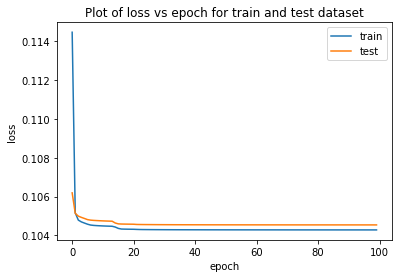

In [22]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history_train['loss'])
plt.plot(history_train['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('C:\\Users\\LENOVO\\OneDrive\\Máy tính\\DocumentFolder\\ae_multi_loss.png')
plt.show()

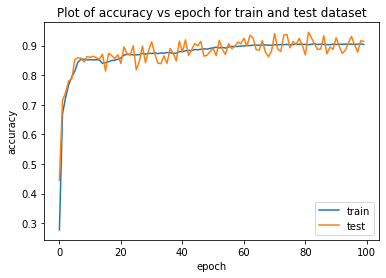

In [23]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history_train['accuracy'])
plt.plot(history_train['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('C:\\Users\\LENOVO\\OneDrive\\Máy tính\\DocumentFolder\\ae_multi_accuracy.png')
plt.show()

In [24]:
# representation of model layers
from keras.utils.vis_utils import plot_model
plot_model(autoencoder, to_file='C:\\Users\\LENOVO\\OneDrive\\Máy tính\\DocumentFolder\\ae_multi.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


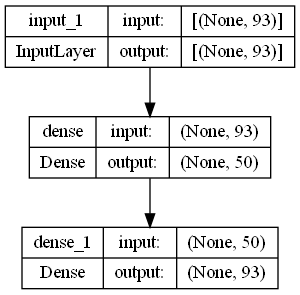

In [28]:
# representation of model layers
from keras.utils.vis_utils import plot_model
plot_model(autoencoder, to_file='C:\\Users\\LENOVO\\OneDrive\\Máy tính\\DocumentFolder\\ae_multi.png', show_shapes=True)

In [27]:
conda install pydot

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\LENOVO\anaconda3

  added / updated specs:
    - pydot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    conda-22.11.1              |   py39haa95532_4         892 KB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hda2c7e1_0         676 KB
    libffi-3.4.2               |       hd77b12b_6         109 KB
    libgd-2.3.3                |       ha43c60c_1      

In [37]:
# calculating reconstruction error
pred = np.argmax(predictions, axis=1)

985/985 [==============================] - 1s 1ms/step


In [45]:
# y_test_arg=np.argmax(y_test)
Y_pred = np.argmax(autoencoder.predict(X_test),axis=1)
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test, Y_pred))

985/985 [==============================] - 1s 1ms/step
Confusion Matrix
[[2432  165   66  112   81   26 7271  145  587  133    2   53  253  158]
 [ 464   23    7   11    0  992   88   65  707   54    3   56  157  320]
 [   0  247    1    1    0   21    2    0    2    0    0    0    0    0]
 [   0   14    0    0    0    0    0    0    0    0    0    0    0    1]
 [ 403 3929   44   75   78  521   25 9665  455  256    5   32    8 1278]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 

In [46]:
predictions = autoencoder.predict(X_test)
for j in range(0,predictions.shape[1]):
  for i in range(0,predictions.shape[0]):
    predictions[i][j] = int(round(predictions[i][j]))

985/985 [==============================] - 1s 1ms/step


In [47]:
predictions

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
len(y_test)

31494

In [61]:
len(Y_pred)

31494

In [77]:
Y_pred = autoencoder.predict(X_test)

985/985 [==============================] - 6s 6ms/step


In [78]:
len(Y_pred)

31494

In [79]:
Y_pred

array([[6.8115114e-08, 3.0635906e-08, 1.5042620e-09, ..., 2.2701202e-11,
        2.8255805e-01, 2.1794963e-11],
       [3.1319980e-18, 3.5805307e-08, 2.4528559e-01, ..., 8.3900764e-10,
        4.7660313e-12, 2.0092150e-09],
       [3.0216458e-01, 2.1396818e-09, 1.7420648e-01, ..., 6.2217831e-10,
        9.5258647e-15, 1.1726927e-09],
       ...,
       [4.1847661e-10, 4.8637968e-01, 1.8352612e-09, ..., 1.2474308e-09,
        2.4384581e-01, 2.9260663e-10],
       [3.6526335e-18, 1.4249238e-07, 8.0784147e-08, ..., 1.5182365e-10,
        9.7111515e-06, 5.3685868e-11],
       [5.9781310e-06, 6.3595880e-09, 2.4555305e-01, ..., 6.5775113e-10,
        1.4941510e-15, 8.5648111e-10]], dtype=float32)

In [84]:
Y2=np.argmax(Y_pred, axis=1)

In [81]:
# print("Recall Score - ",recall_score(y_test, pred_df.astype('uint8'),average='micro'))
# print("F1 Score - ",f1_score(y_test, pred_df.astype('uint8'),average='micro'))
# print("Precision Score - ",precision_score(y_test, pred_df.astype('uint8'),average='micro'))
# from sklearn.metrics import accuracy_score
# y_pred = [0, 2, 1, 3]
# Y_pred = autoencoder.predict(X_test)
# print(f1_score(y_test, Y_pred, average='micro'))
# print(accuracy_score(y_test, Y_pred))

In [88]:
y_test,Y2

(array([4, 0, 0, ..., 4, 1, 0], dtype=int64),
 array([ 5,  6,  0, ...,  1, 10,  6], dtype=int64))

In [89]:
recall_score(y_test, Y2,average='micro')

0.08045977011494253